In [1]:
from src.utils.data_processing import data_summary, count_instances, crop_brain_contour, corp_dataset
from src.utils.exploratory_data_analysis import *
import os
from matplotlib import pyplot as plt
import cv2

In [2]:
augmented_data_path = "../data/interim/split/train/augmented/"
data_summary = data_summary(augmented_data_path)
print(data_summary)

Total instances: 1231
Percentage of yes: 52.88%
Percentage of no: 47.12%


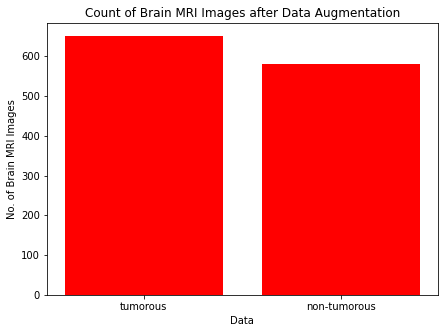

In [3]:
number_files_yes = count_instances(os.path.join(augmented_data_path, 'yes'))
number_files_no = count_instances(os.path.join(augmented_data_path, 'no'))
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}
typex = [*data.keys()]
values = [*data.values()]

fig = plt.figure(figsize = (7, 5))

plt.bar(typex, values, color = 'red')

plt.xlabel("Data")
plt.ylabel("No. of Brain MRI Images")
plt.title("Count of Brain MRI Images after Data Augmentation")
plt.savefig("../data/external/number_augmented_images.jpeg", format='jpeg', dpi=150, bbox_inches='tight')
plt.show()

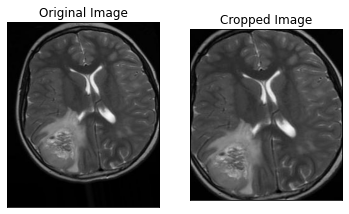

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [1, 1, 1],
        [1, 1, 1]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [4, 4, 4],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [4]:
list_augmented_yes = os.listdir(os.path.join(augmented_data_path, 'yes'))
list_augmented_no = os.listdir(os.path.join(augmented_data_path, 'no'))
ex_img_yes = plt.imread(os.path.join(augmented_data_path, 'yes', list_augmented_yes[0]))
cv2.cvtColor(ex_img_yes, cv2.COLOR_BGR2GRAY)
crop_brain_contour(ex_img_yes, True)

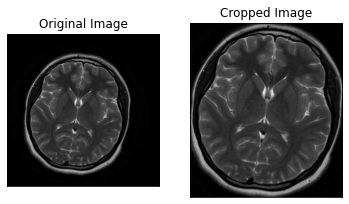

In [5]:
ex_img_no = plt.imread(os.path.join(augmented_data_path, 'no', list_augmented_no[0]))
cv2.cvtColor(ex_img_no, cv2.COLOR_BGR2GRAY)
test = crop_brain_contour(ex_img_no, True)

In [6]:
corp_dataset("../data/processed", augmented_data_path ,"../data/interim/split/validation", "../data/interim/split/test")

'Dataset cropped successfully'

In [7]:
total_test = count_instances("../data/processed/test/yes") + count_instances("../data/processed/test/no")
total_train = count_instances("../data/processed/train/yes") + count_instances("../data/processed/train/no")
total_validation = count_instances("../data/processed/validation/yes") + count_instances("../data/processed/validation/no")
total = total_test + total_train + total_validation

# Print the total and porcetages of each one
print("Total number of images in train: ", total_train)
print("Total number of images in validation: ", total_validation)
print("Total number of images in test: ", total_test)
print("Total number of images: ", total)


Total number of images in train:  1231
Total number of images in validation:  50
Total number of images in test:  52
Total number of images:  1333
